# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [Marc LIN]([link](https://github.com/mmarclin))
- [Antoine AMIEL]([link](https://github.com/antoineamiel))

```
conda create --name=lab3 --file=requirement.txt
conda activate lab3
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab3
```

In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [71]:
import numpy as np

rng = np.random.default_rng(42) # Seed for reproducibility, fixed value 42

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

> Recall of the Linear Interpolation (LERP) for $n$-dimensional vectors:
> - Clearly, $\vec{D}=\alpha \vec{C}$ with $\alpha \in [0, 1]$ and hence $\vec{P}-\vec{B}= \alpha (\vec{A}-\vec{B})$ which is equivalent to $\vec{P}= (1-\alpha) \vec{B} + \alpha \vec{A}$. 
![alternatvie text](img/for_Course.png)

**Answer:**

In [72]:
def brownian_motion(niter, x, step, rng):
    """
    Simulate a 2D Brownian motion starting from x until it exits the unit circle or reaches niter steps.

    Args:
        niter (integer): maximum number of iterations
        x (np.darray): starting point
        step (float): step size
        rng (np.random): random number generator

    Returns:
        W (list of np.darray): list of points in the Brownian motion
        intersection (np.darray or None): intersection point with the unit circle, or None if not exited
    """

    assert x.shape == (2,), "Starting point must be a 2D point"
    assert np.linalg.norm(x) < 1, "Starting point must be inside the unit circle"
    assert step > 0, "Step size must be positive"
    assert niter > 0, "Number of iterations must be positive"
    assert isinstance(rng, np.random.Generator), "rng must be a numpy random Generator"

    W = [x]
    intersection = None
    for _ in range(niter):
        W.append(W[-1] + np.sqrt(step)*rng.normal(size=2))
        if np.linalg.norm(W[-1]) >= 1:
            # Interpolation to find intersection with unit circle
            a = np.sum((W[-1]-W[-2])**2)
            b = 2 * np.dot(W[-2], W[-1]-W[-2])
            c = np.sum(W[-2]**2) - 1
            # Find roots of quadratic equation
            roots = np.roots([a, b, c])
            # Select alpha in [0,1]
            alpha = roots[np.logical_and(roots >= 0, roots <= 1)]
            if alpha.size > 0:
                alpha = alpha[0]
                intersection = (1 - alpha) * W[-2] + alpha * W[-1]
            return W, intersection
    return W, None

3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

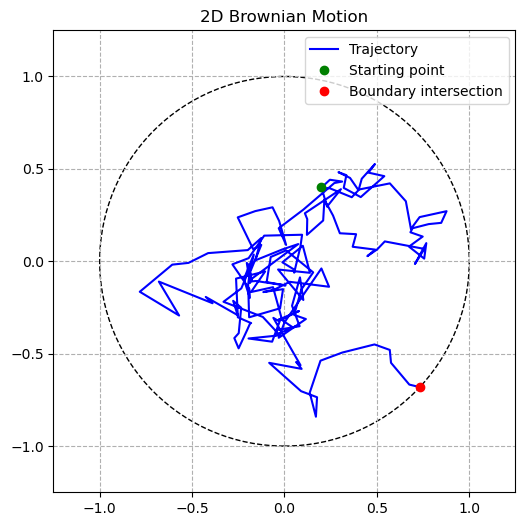

In [73]:
import matplotlib.pyplot as plt

W, intersection = brownian_motion(1000, np.array([0.2, 0.4]), 0.01, rng)
W = np.array(W)

# Plot the trajectory
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(W[:, 0], W[:, 1], lw=1.5, color="blue", label="Trajectory")
ax.plot(W[0, 0], W[0, 1], "go", label="Starting point")
if intersection is not None:
    ax.plot(*intersection, "ro", label="Boundary intersection")

# Draw unit circle (boundary)
circle = plt.Circle((0, 0), 1, color="black", fill=False, linestyle="--")
ax.add_artist(circle)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle="--", zorder=1)
ax.set_aspect(1)
ax.set_title("2D Brownian Motion")
ax.legend()

plt.show()

4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

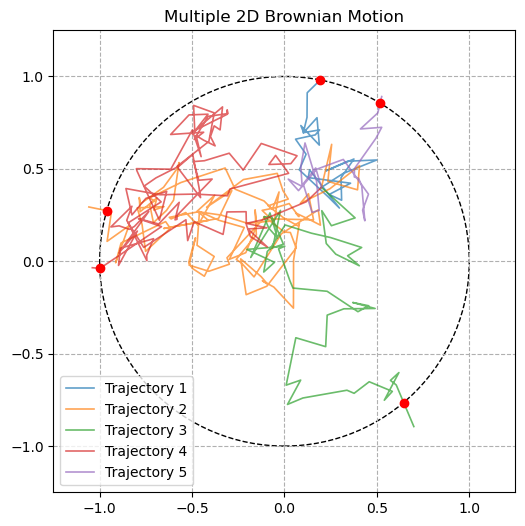

In [74]:
import matplotlib.pyplot as plt

n_traj = 5
niter = 1000
step = 0.01
x0 = np.array([0.2, 0.4])

fig, ax = plt.subplots(figsize=(6, 6))

# Plot the trajectory of 5 Brownian motions
for i in range(n_traj):
    W, intersection = brownian_motion(niter, x0, step, rng)
    W = np.array(W)

    ax.plot(W[:, 0], W[:, 1], lw=1.2, alpha=0.7, label=f"Trajectory {i+1}")
    if intersection is not None:
        ax.plot(*intersection, "ro", markersize=6)

# Draw unit circle (boundary)
circle = plt.Circle((0, 0), 1, color="black", fill=False, linestyle="--")
ax.add_artist(circle)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle="--", zorder=1)
ax.set_aspect(1)
ax.set_title("Multiple 2D Brownian Motion")
ax.legend()

plt.show()

5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

In [75]:
def generalized_brownian_motion(niter, x, step, rng):
    """
    Simulate a Brownian motion starting from x until it exits the unit ball or reaches niter steps.

    Args:
        niter (integer): maximum number of iterations
        x (np.darray): starting point
        step (float): step size
        rng (np.random): random number generator

    Returns:
        W (list of np.darray): list of points in the Brownian motion
        intersection (np.darray or None): intersection point with the unit circle, or None if not exited
    """
    assert x.ndim == 1, "Starting point must be a 1D array"
    assert np.linalg.norm(x) < 1, "Starting point must be inside the unit circle"
    assert step > 0, "Step size must be positive"
    assert niter > 0, "Number of iterations must be positive"
    assert isinstance(rng, np.random.Generator), "rng must be a numpy random Generator"

    W = [x]
    intersection = None
    for _ in range(niter):
        W.append(W[-1] + np.sqrt(step)*rng.normal(size=x.shape))
        if np.linalg.norm(W[-1]) >= 1:
            # Interpolation to find intersection with unit circle
            d = W[-1] - W[-2]
            a = np.dot(d, d)
            b = 2 * np.dot(W[-2], d)
            c = np.dot(W[-2], W[-2]) - 1
            # Find roots of quadratic equation
            roots = np.roots([a, b, c])
            # Select alpha in [0,1]
            alpha = roots[np.logical_and(roots >= 0, roots <= 1)]
            if alpha.size > 0:
                alpha = alpha[0]
                intersection = (1 - alpha) * W[-2] + alpha * W[-1]
            return W, intersection
    return W, intersection

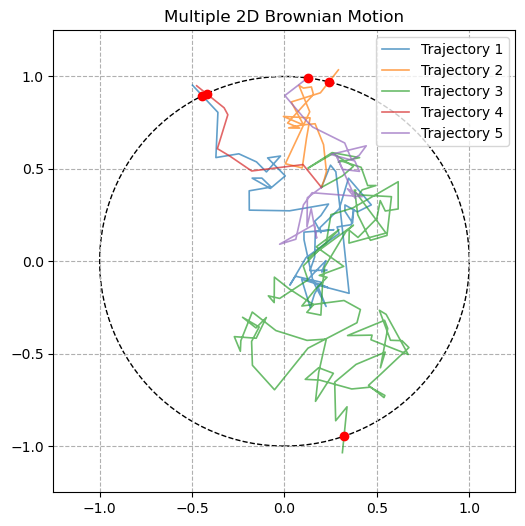

In [76]:
# We test this new function with 2D Brownian motion to see if it works
n_traj = 5
niter = 1000
step = 0.01
x0 = np.array([0.2, 0.4])

fig, ax = plt.subplots(figsize=(6, 6))

# Plot the trajectory of 5 Brownian motions in 2D
for i in range(n_traj):
    W, intersection = generalized_brownian_motion(niter, x0, step, rng)
    W = np.array(W)

    ax.plot(W[:, 0], W[:, 1], lw=1.2, alpha=0.7, label=f"Trajectory {i+1}")
    if intersection is not None:
        ax.plot(*intersection, "ro", markersize=6)

# Draw unit circle (boundary)
circle = plt.Circle((0, 0), 1, color="black", fill=False, linestyle="--")
ax.add_artist(circle)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle="--", zorder=1)
ax.set_aspect(1)
ax.set_title("Multiple 2D Brownian Motion")
ax.legend()

plt.show()

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

**Answer:**

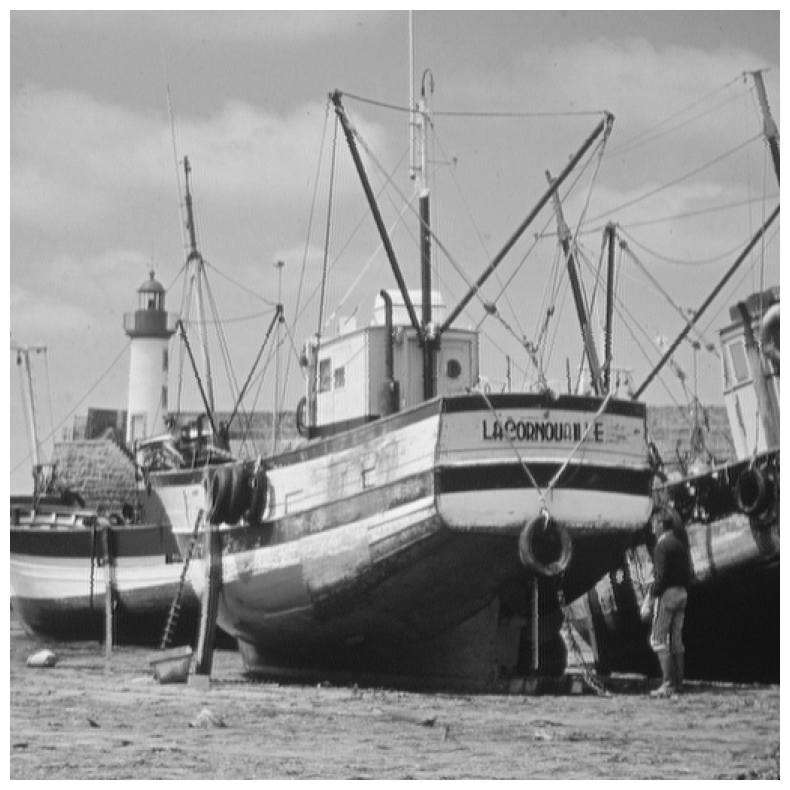

In [77]:
from PIL import Image

import matplotlib.pyplot as plt

# Load image
img = plt.imread('img/boat.png')
if len(img.shape) == 3:  # If image is RGB, convert to grayscale
    img = img.mean(axis=2)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

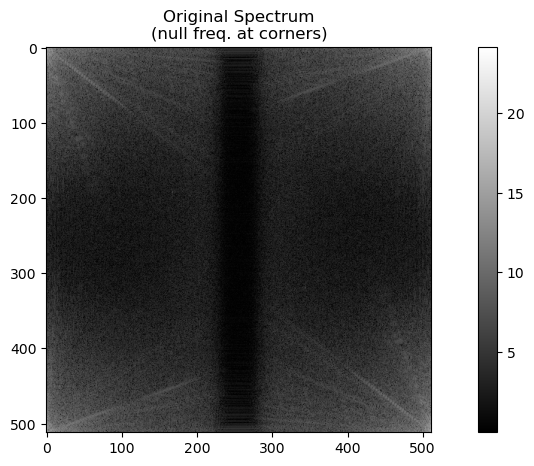

In [78]:
# Compute 2D FFT and spectrum
fft_img = np.fft.fft2(img)
spectrum = np.abs(fft_img)**2

# Display spectrum in log scale
plt.figure(figsize=(12, 5))
plt.imshow(np.log(spectrum + 1), cmap='gray') # logarithmic scale, we add 1 to avoid log(0)
plt.title('Original Spectrum\n(null freq. at corners)')
plt.colorbar()
plt.show()

In this representation, the pixel of the spectrum associated with the null frequency is located at the top left corner, ie index (0,0)

In [79]:
print(f'Null Frequency: {fft_img[0, 0].real}')

Null Frequency: 170491.37392020226


b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

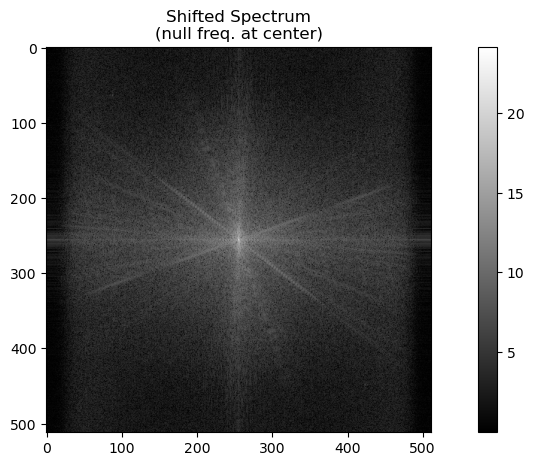

In [80]:
# Compute 2D FFT and spectrum
fft_img_shifted = np.fft.fftshift(fft_img)
spectrum_shifted = np.abs(fft_img_shifted)**2

# Display shifted spectrum in log scale
plt.figure(figsize=(12, 5))
plt.imshow(np.log(spectrum_shifted + 1), cmap='gray')
plt.title('Shifted Spectrum\n(null freq. at center)')
plt.colorbar()
plt.show()

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).


In [81]:
def ideal_lowpass_filter(X, fc):
    # 2D FFT and shift
    fft_img = np.fft.fft2(X)
    fft_img_shifted = np.fft.fftshift(fft_img)

    # Build filter mask
    fc_y, fc_x = fc
    Ny, Nx = X.shape
    mask = np.zeros((Ny, Nx))
    cy, cx = Ny // 2, Nx // 2
    mask[cy - fc_y:cy + fc_y, cx - fc_x:cx + fc_x] = 1

    # Apply filter in frequency domain
    filtered_fft_shifted = fft_img_shifted * mask

    # Inverse shift and inverse FFT
    filtered_fft = np.fft.ifftshift(filtered_fft_shifted)
    X_filtered = np.fft.ifft2(filtered_fft).real

    return X_filtered

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?

As the cutoff increase, the image is more clear because we are cutting less frequencies from the initial image

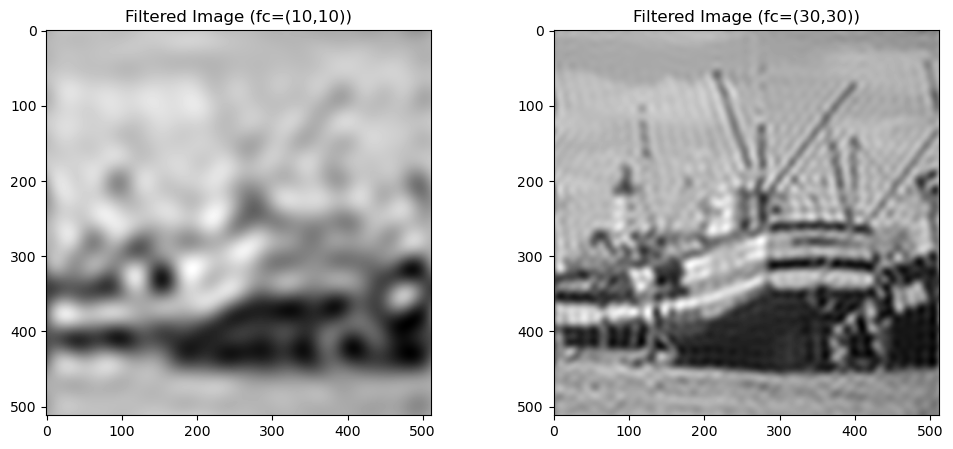

In [82]:
X1_filtered = ideal_lowpass_filter(img, (10, 10))
X2_filtered = ideal_lowpass_filter(img, (30, 30))

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.imshow(X1_filtered, cmap='gray')
plt.title('Filtered Image (fc=(10,10))')

plt.subplot(122)
plt.imshow(X2_filtered, cmap='gray')
plt.title('Filtered Image (fc=(30,30))')
plt.show()

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform.

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis) (or `np.reshape` or built-in `np.outer`).

**Answer:**

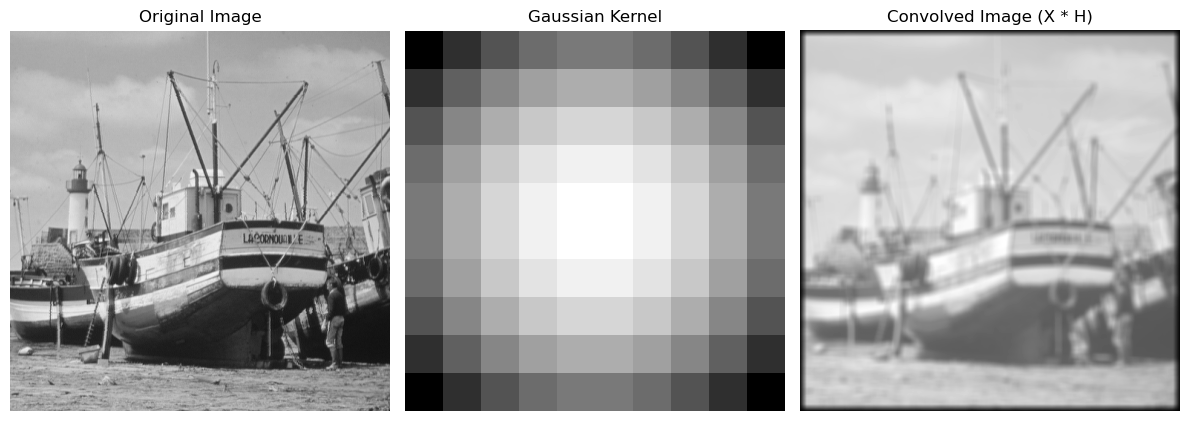

In [89]:
from scipy.signal.windows import gaussian

# Create 2D Gaussian kernel with given std and size
M2 = N2 = 10
sigma_y = sigma_x = 10

# Generate 1D Gaussian windows
wy = gaussian(M2, std=sigma_y)
wx = gaussian(N2, std=sigma_x)

# Create 2D Gaussian kernel as outer product and normalize
H = np.outer(wy, wx)
H = H / np.sum(H)

# Compute linear convolution using FFT
M = img.shape[0] + M2 - 1
N = img.shape[1] + N2 - 1

# Zero-pad both images to size (M, N)
img_padded = np.zeros((M, N))
img_padded[:img.shape[0], :img.shape[1]] = img

H_padded = np.zeros((M, N))
H_padded[:H.shape[0], :H.shape[1]] = H

# Compute convolution via FFT
fft_img = np.fft.rfft2(img_padded)
fft_H = np.fft.rfft2(H_padded)
convolution_result = np.fft.irfft2(fft_img * fft_H)

# Display results
plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(H, cmap='gray')
plt.title('Gaussian Kernel')
plt.axis('off')

plt.subplot(133)
plt.imshow(convolution_result, cmap='gray')
plt.title('Convolved Image (X * H)')
plt.axis('off')

plt.tight_layout()
plt.show()

We observe that the image becomes blurred, and borders become dark because of the padding.